In [1]:
%matplotlib notebook

#dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc


In [2]:
#Read the csv datafile
mort_data=pd.read_csv('Cleaned-gun-deaths.csv')
mort_df=pd.DataFrame(mort_data)
mort_df.head()

,Unnamed: 0,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,suicide
1,1,Residents,January,F,19,15 - 24,Other,S,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,suicide
2,2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,suicide
3,3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,2015,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,Assault (homicide)
4,4,Residents,January,F,40,35 - 44,Other,D,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,suicide


In [3]:
#check the mortality data by gender
mort_df.describe()
df_s=mort_df['Sex'].value_counts()

df_s

 M    98432
 F    16633
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


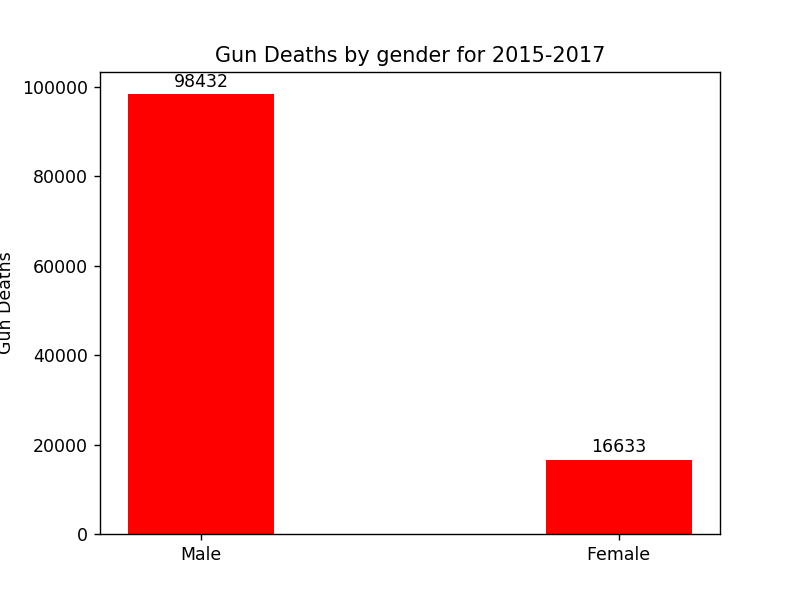

In [4]:
# #plotting the bar graph to show the gender based deaths
# death_cnt=mort_df.loc(mort_df['Sex']=='M').count()

#calculate the count for Gun deaths for the 3 years by gender
gender_death_cnt=[df_s[0],df_s[1]]
gender_death_cnt
gender=['Male','Female']

fig, ax = plt.subplots()

#define function to label the bars with counts
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
rect=ax.bar(gender, gender_death_cnt, color='r', width=0.35 , align="center")
autolabel(rect)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gun Deaths')
ax.set_title('Gun Deaths by gender for 2015-2017')
ax.set_xticks(gender)

plt.show()

<IPython.core.display.Javascript object>


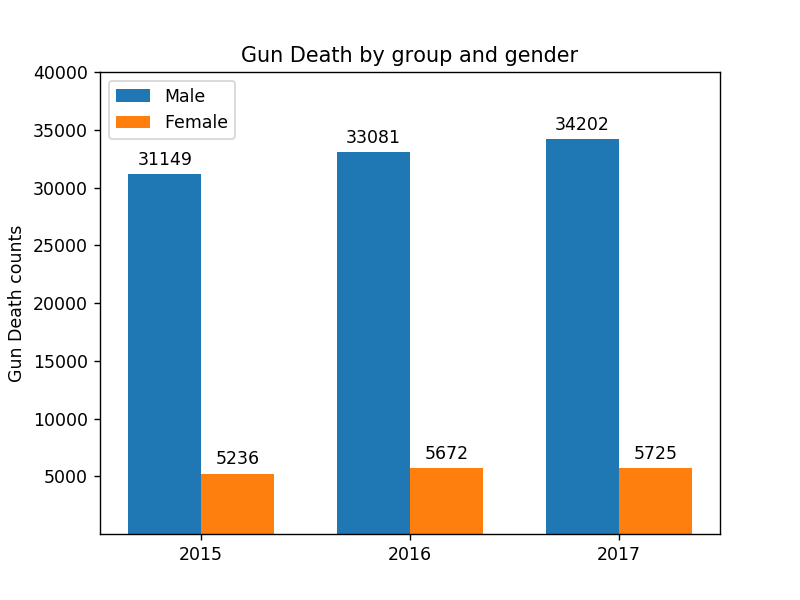

In [11]:
#Plot a graph to show the yearly dividsion of gun deaths by gender

grp_data=mort_df.groupby(['Data_Year','Sex'])
death_cnts=grp_data['Data_Year'].count()

labels=['2015','2016','2017']
female_death_cnts=[death_cnts[0],death_cnts[2],death_cnts[4]]
male_death_cnts=[death_cnts[1],death_cnts[3],death_cnts[5]]

#death_cnts

# # Create a bar chart based off of the group series from before
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_death_cnts, width, label='Male')
rects2 = ax.bar(x + width/2, female_death_cnts, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gun Death counts')
ax.set_title('Gun Death by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()
ax.set_ylim(1,40000)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# Create a legend for our chart
plt.legend(handles=[rects1, rects2], loc="best")


#fig.tight_layout()

plt.show()

plt.savefig('Bhumika_plot_images/Gun_deaths_byGender_2015-2017.png')

<IPython.core.display.Javascript object>


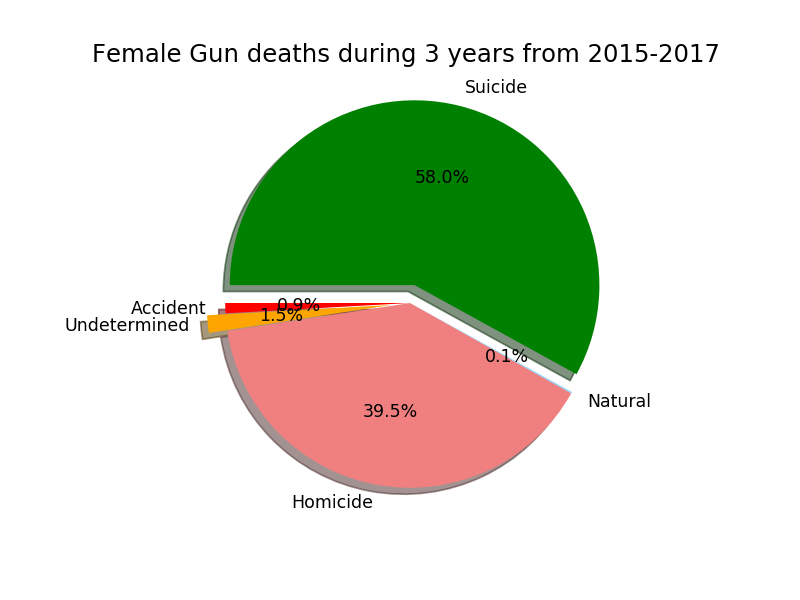

In [9]:
fig, ax2 = plt.subplots()

#plt.figure(figsize=(9, 3))

#plt.subplot(131)
group_data=mort_df.groupby(['Sex','Manner_Of_Death'])
death_manner_s_cnts=group_data['Sex'].count()
death_manner_s_cnts

undetermined=death_manner_s_cnts[1]+death_manner_s_cnts[4]+death_manner_s_cnts[6]
manner_of_death=['Accident','Undetermined','Homicide','Natural','Suicide']


female_acc_death=[death_manner_s_cnts[0],undetermined,death_manner_s_cnts[2],death_manner_s_cnts[3],death_manner_s_cnts[5]]
# male_acc_death=[death_manner_s_cnts[7],death_manner_s_cnts[8],death_manner_s_cnts[9],death_manner_s_cnts[10],death_manner_s_cnts[11],death_manner_s_cnts[12],,death_manner_s_cnts[13]]
#sizes=female_acc_death
explode = (0, 0.1, 0, 0,0.1,)
colors = ["red", "orange", "lightcoral", "lightskyblue","green","blue","yellow"]
ax2.pie(female_acc_death, explode=explode, labels=manner_of_death, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180,textprops={'fontsize': 10})

texts =ax2.set_title("Female Gun deaths during 3 years from 2015-2017 ")

texts.set_fontsize(14)
plt.savefig('Bhumika_plot_images/Female_Gun_deaths_2015-2017.png')

<IPython.core.display.Javascript object>


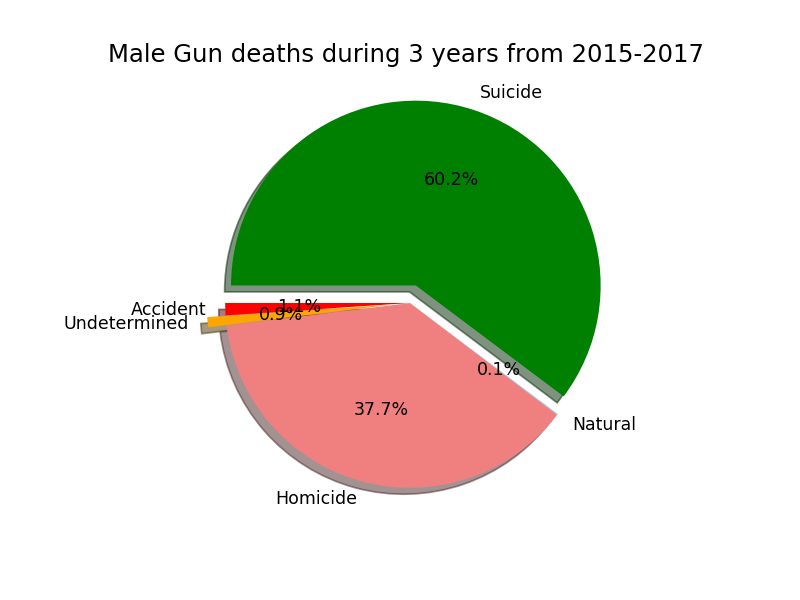

In [10]:
fig, ax3 = plt.subplots()

group_data=mort_df.groupby(['Sex','Manner_Of_Death'])
death_manner_s_cnts=group_data['Sex'].count()
death_manner_s_cnts

male_undetermined=death_manner_s_cnts[8]+death_manner_s_cnts[11]+death_manner_s_cnts[13]
manner_of_death=['Accident','Undetermined','Homicide','Natural','Suicide']

male_acc_death=[death_manner_s_cnts[7],male_undetermined,death_manner_s_cnts[9],death_manner_s_cnts[10],death_manner_s_cnts[12]]
#sizes=female_acc_death
explode = (0, 0.1, 0, 0,0.1,)
colors = ["red", "orange", "lightcoral", "lightskyblue","green","blue","yellow"]
ax3.pie(male_acc_death, explode=explode, labels=manner_of_death, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
texts=ax3.set_title("Male Gun deaths during 3 years from 2015-2017 ")
texts.set_fontsize(14)

plt.savefig('Bhumika_plot_images/male_Gun_deaths_2015-2017.png')